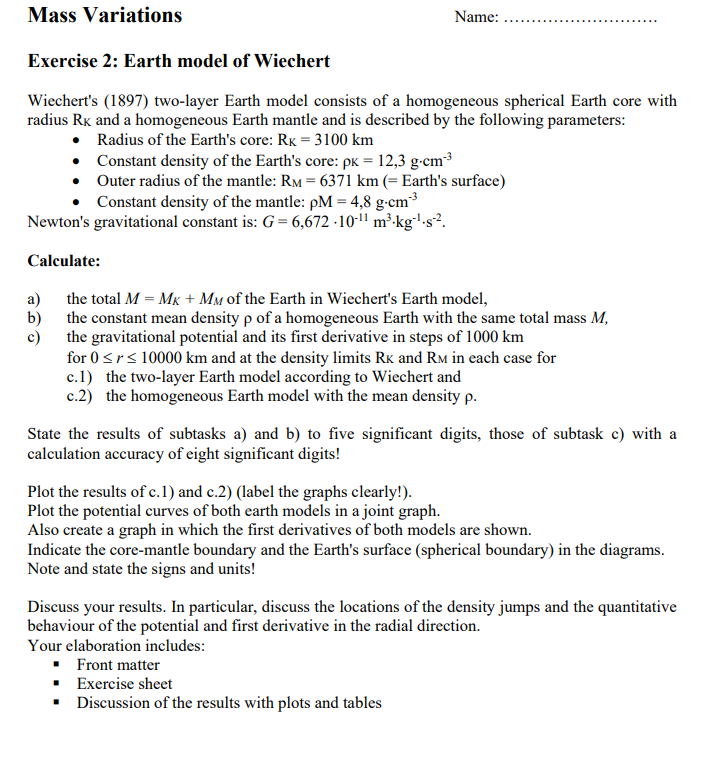

In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# Constants
G = 6.672e-11  # Gravitational constant in m^3/(kg*s)
RK = 3100e3  # Radius of the Earth's core in meters
rhoK = 12.3e3  # Constant density of the Earth's core in kg/m^3
RM = 6371e3  # Outer radius of the mantle in meters
rhoM = 4.8e3  # Constant density of the mantle in kg/m^3

In [54]:
# Function to calculate total mass of the Earth in Wiechert's Earth model
def total_mass():
    MK = (4/3) * np.pi * rhoK * RK**3
    MM = (4/3) * np.pi * rhoM * (RM**3 - RK**3)
    M = MK + MM
    return M

# Function to calculate constant mean density of a homogeneous Earth
def mean_density(M):
    rho_mean = M / ((4/3) * np.pi * RM**3)
    return rho_mean

# Calculate total mass and mean density
M = total_mass()
rho = mean_density(M)

# Display results for total mass and mean constant density
print(f"Total mass M = {M:.5e} kg")
print(f"Constant mean density ρ = {rho:.5f} kg/m^3")

Total mass M = 6.13531e+24 kg
Constant mean density ρ = 5664.01947 kg/m^3


In [55]:
# Function to calculate gravitational potential in different layers of Wiechert's model
def gravitational_potential(r, model, layer):
    if  model == "Wiechert's Earth Model":
        if layer == "core":
            if r < RK:
                return (G * 4 * np.pi * rhoK * r ** 2) / 3
            elif RK <= r < RM:
                return (2 * np.pi * G * rhoK * (RK ** 2 - r ** 2))
            elif r == RM:
                return (2 * np.pi * G * rhoM * (r ** 2 - RK ** 2))
        elif layer == "mantle":
            if r==RK:
                return (G * 4 * np.pi * rhoK * RK ** 3) / (3 * r)
            elif RK <= r < RM:
                return (4 * np.pi * G * rhoM * (r ** 3 - RK ** 3)) / (3 * r)
            elif r > RM:
                return (2 * np.pi * G * rhoM * (RM ** 2 - r ** 2))
        elif layer == "space":
            if r==RM:
                return (G * 4 * np.pi * rhoM * RM ** 3) / (3 * r)
            elif RM < r <= 10000000:
                return (G * M / r)

# Calculate gravitational potentials for both layers of Wiechert's model
r_values_core = np.linspace(0, RK, 1000000)
r_values_mantle = np.linspace(RK, RM, 1000000)
r_values_space = np.linspace(RM, 10000000, 1000000)

Wiechert_core_potentials = [gravitational_potential(r, "Wiechert's Earth Model", "core") for r in r_values_core]
Wiechert_mantle_potentials = [gravitational_potential(r, "Wiechert's Earth Model", "mantle") for r in r_values_mantle]
Wiechert_space_potentials = [gravitational_potential(r, "Wiechert's Earth Model", "space") for r in r_values_space]

# Merge all potentials into a single list for plotting
Wiechert_model_potentials = Wiechert_core_potentials + Wiechert_mantle_potentials + Wiechert_space_potentials
r_values = np.concatenate([r_values_core, r_values_mantle, r_values_space])

In [56]:
# Display results for total mass and mean constant density
print(f"Total mass M = {M:.5e} kg")
print(f"Constant mean density ρ = {rho:.5f} kg/m^3")

Total mass M = 6.13531e+24 kg
Constant mean density ρ = 5664.01947 kg/m^3


In [57]:
M

6.135305068290552e+24

In [58]:
rho

5664.019471142471

In [59]:
# Function to calculate gravitational potential in Homogeneous Earth model
def gravitational_potential(r, model):
    if  model == "Homogeneous Earth Model":
        if r < RK:
            return(2 * np.pi * G * rho * (RM ** 2 - RK ** 2))
        elif RK <= r <= RM:
            return(2 * np.pi * G * rho * (RM ** 2 - (2 / (3 * r)) * RK ** 3 - (1 / 3) * r ** 2))
        elif r > RM:
            return((4 / (3 * r)) * np.pi * G * rho * (RM ** 3 - RK ** 3))
r_values_hom = np.linspace(0, 10000000, 1000000)
homogeneous_potentials = [gravitational_potential(r, "Homogeneous Earth Model") for r in r_values_hom]

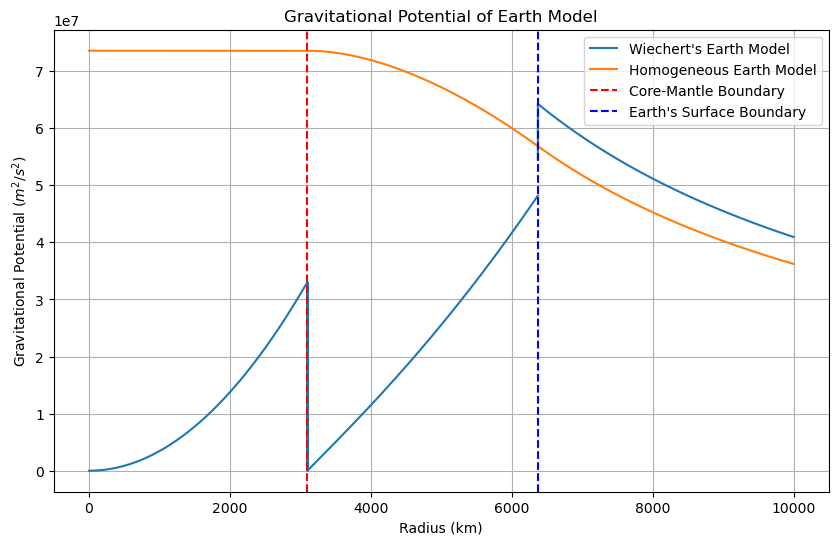

In [60]:
# Plotting
plt.figure(figsize=(10, 6))


plt.plot(r_values/1e3, Wiechert_model_potentials, label="Wiechert's Earth Model")
plt.plot(r_values_hom/1e3, homogeneous_potentials, label="Homogeneous Earth Model")

plt.title("Gravitational Potential of Earth Model")
plt.xlabel("Radius (km)")
plt.ylabel("Gravitational Potential ($m^2/s^2$)")
plt.axvline(x=RK/1e3, linestyle='--', color='r', label='Core-Mantle Boundary')
plt.axvline(x=RM/1e3, linestyle='--', color='b', label="Earth's Surface Boundary")
plt.legend(loc='best')
plt.grid(True)

plt.savefig("gravitational_potential.png", dpi=300, bbox_inches='tight')

plt.show()

In [61]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Constants
G = 6.672e-11  # Gravitational constant in m^3/(kg*s)
RK = 3100e3  # Radius of the Earth's core in meters
rhoK = 12.3e3  # Constant density of the Earth's core in kg/m^3
RM = 6371e3  # Outer radius of the mantle in meters
rhoM = 4.8e3  # Constant density of the mantle in kg/m^3

In [64]:
# Function to calculate first derivative of gravitational potential in different layers of Wiechert's model
def first_derivative_gravitational_potential(r, model, layer):
    if  model == "Wiechert's Earth Model":
        if layer == "core":
            if r < RK:
                return (G * 4 * np.pi * rhoK * 2 * r) / 3
            elif RK <= r < RM:
                return (2 * np.pi * G * rhoK * (RK ** 2 - 2 * r))
            elif r == RM:
                return (0)
        elif layer == "mantle":
            if r==RK:
                return (- G * 4 * np.pi * rhoK * RK ** 3) / (3 * r ** 2)
            elif RK <= r < RM:
                return ((4/3) * np.pi * G * rhoM * (2 * r + (RK ** 3) / (r ** 2)))
            elif r > RM:
                return (2 * np.pi * G * rhoM * (RM ** 2 - 2 * r))
        elif layer == "space":
            if r==RM:
                return (- G * 4 * np.pi * rhoM * RM ** 3) / (3 * r ** 2)
            elif RM < r <= 10000000:
                return (- G * M / (r ** 2))

# Calculate gravitational potentials for both layers of Wiechert's model
deriv_r_values_core = np.linspace(0, RK, 1000000)
deriv_r_values_mantle = np.linspace(RK, RM, 1000000)
deriv_r_values_space = np.linspace(RM, 10000000, 1000000)

deriv_Wiechert_core_potentials = [first_derivative_gravitational_potential(r, "Wiechert's Earth Model", "core") for r in deriv_r_values_core]
deriv_Wiechert_mantle_potentials = [first_derivative_gravitational_potential(r, "Wiechert's Earth Model", "mantle") for r in deriv_r_values_mantle]
deriv_Wiechert_space_potentials = [first_derivative_gravitational_potential(r, "Wiechert's Earth Model", "space") for r in deriv_r_values_space]

# Merge all potentials into a single list for plotting
deriv_Wiechert_model_potentials = deriv_Wiechert_core_potentials + deriv_Wiechert_mantle_potentials + deriv_Wiechert_space_potentials
deriv_r_values = np.concatenate([deriv_r_values_core, deriv_r_values_mantle, deriv_r_values_space])
# deriv_r_values = np.linspace(0, 10000000, 1000000)

In [65]:
# Function to calculate first derivative of gravitational potential in Homogeneous Earth model
def first_derivative_gravitational_potential(r, model):
    if  model == "Homogeneous Earth Model":
        if r < RK:
            return(0)
        elif RK <= r <= RM:
            return(2 * np.pi * G * rho * (RM ** 2 + (2 / (3 * r ** 2)) * RK ** 3 - (1 / 3) * 2 * r))
        elif r > RM:
            return((- 4 / (3 * r ** 2)) * np.pi * G * rho * (RM ** 3 - RK ** 3))
deriv_r_values_hom = np.linspace(0, 10000000, 1000000)
deriv_homogeneous_potentials = [first_derivative_gravitational_potential(r, "Homogeneous Earth Model") for r in deriv_r_values_hom]

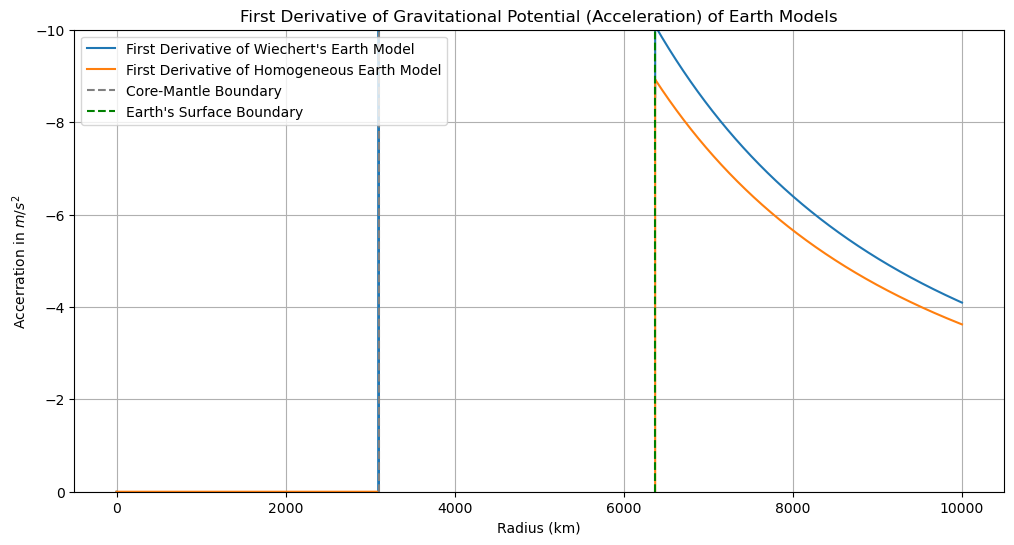

In [67]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(deriv_r_values/1e3, deriv_Wiechert_model_potentials, label="First Derivative of Wiechert's Earth Model")
plt.plot(deriv_r_values_hom/1e3, deriv_homogeneous_potentials, label="First Derivative of Homogeneous Earth Model")


plt.title("First Derivative of Gravitational Potential (Acceleration) of Earth Models")
plt.xlabel("Radius (km)")
plt.ylabel("Accerration in $m/s^2$")

plt.axvline(x=RK/1e3, linestyle='--', color='gray', label='Core-Mantle Boundary')
plt.axvline(x=RM/1e3, linestyle='--', color='green', label="Earth's Surface Boundary")

plt.legend(loc='best')

plt.grid(True)
# plt.yscale('log')  # Using logarithmic scale for better visualization
plt.ylim(0, -10)  # Adjust the y-axis limits for better visualization

plt.savefig("gravitational_acceleration.png", dpi=300, bbox_inches='tight')

plt.show()